# **导入模型所需要的库**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

# **准备实验数据**

In [ ]:
# 从2-10之间产生20个等差数列，形状改成[n,1]
x = np.linspace(2,10,20).reshape(-1,1)  # 特征

# y = ax + b, a = 2, b = 3
y = 2 * x + 3 # 目标

# 给目标值添加噪声，避免全部数据都在一条直线上
y += np.random.randn(20,1) * 0.5

# **可视化数据**

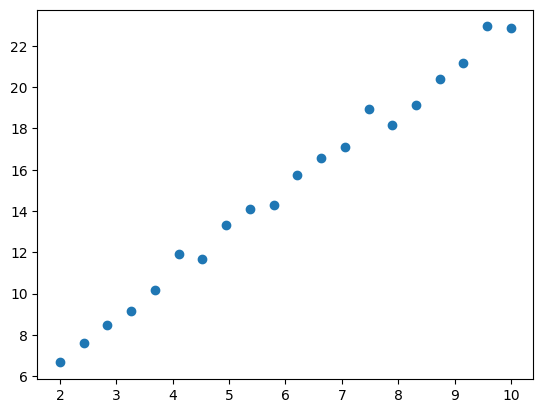

In [ ]:
plt.scatter(x,y)

# **搭建模型**

In [ ]:
class LinearModel:
  def __init__(self):
    self.w = np.random.randn()
    self.b = np.random.randn()

  def model(self,x):
    # 构建线性回归模型
    return self.w * x + self.b

  def loss(self,x,y):
    # 计算预测值与真实值的误差
    cost = (self.model(x) - y) **2

    # 求w和b的偏导数
    g_w = 2 * (self.model(x) - y) * x
    g_b = 2 * (self.model(x) - y)
    return cost,g_w,g_b

  def g_descent(self,g_w,g_b,lr = 0.1):
    # 实现参数的更新
    self.w -= lr * g_w
    self.b -= lr * g_b

  # 训练模型
  def fit(self,x,y):
    # 停止训练的条件
    count = 0     # 统计迭代优化次数，退出训练的最大次数
    tol = 0.00001   # 比较前后两次参数的差值，如果差值小于tol，停止训练

    # 记录第一轮的参数 (加上0.1作用是为了避免第一轮就停止训练)
    last_w = self.w + 0.1
    last_b = self.b + 0.1

    # 统计样本个数
    length = len(x)

    while True:
      # 当训练轮数达到3000，停止训练
      if count > 3000:
        break

      # 当参数的精度达到tol，停止训练
      if (abs(last_w - self.w) < tol) and (abs(last_b - self.b) < tol):
        break

      # 初始化变量
      cost = 0
      g_w = 0
      g_b = 0

      # 依次遍历所有样本
      for i in range(length):
        # 计算损失值和梯度
        cost_,g_w_,g_b_ = self.loss(x[i,0],y[i,0])

        # 计算平均
        cost += cost_ / length
        g_w += g_w_ / length
        g_b += g_b_ / length

      print(f"执行次数：{count},损失值：{cost}")

      # 每次更新参数之前，记录上一轮的参数
      last_w = self.w
      last_b = self.b

      # 更新参数
      self.g_descent(g_w,g_b,0.002)

      # 记录轮数
      count += 1

      # 训练过程可视化
      # 1. 绘制原始的数据分布情况
      plt.scatter(x,y,c='red')
      # 2. 绘制拟合线
      plt.plot(x,self.w*x+self.b,c='blue')
      # plt.pause(0.1)

  # 返回结果
  def result(self):
    return self.w,self.b

执行次数：0,损失值：427.97893575213004
执行次数：1,损失值：294.4389038980109
执行次数：2,损失值：202.67050009961133
执行次数：3,损失值：139.6073687959427
执行次数：4,损失值：96.27037007807876
执行次数：5,损失值：66.48907997973048
执行次数：6,损失值：46.02321131181704
执行次数：7,损失值：31.958858069690955
执行次数：8,损失值：22.293597345236115
执行次数：9,损失值：15.651373254396322
执行次数：10,损失值：11.08656647340151
执行次数：11,损失值：7.949351718260464
执行次数：12,损失值：5.793172019157288
执行次数：13,损失值：4.311155464090643
执行次数：14,损失值：3.2924210752873635
执行次数：15,损失值：2.592052406887573
执行次数：16,损失值：2.110463538310073
执行次数：17,损失值：1.7792194790635862
执行次数：18,损失值：1.5512920156467143
执行次数：19,损失值：1.3943635740084797
执行次数：20,损失值：1.2862256643913998
执行次数：21,损失值：1.2116167136284868
执行次数：22,损失值：1.1600490379294204
执行次数：23,损失值：1.1243155484965834
执行次数：24,损失值：1.0994635664395866
执行次数：25,损失值：1.0820896330678775
执行次数：26,损失值：1.0698549067422198
执行次数：27,损失值：1.0611521458026802
执行次数：28,损失值：1.054876860756574
执行次数：29,损失值：1.050270051106471
执行次数：30,损失值：1.0468101348160999
执行次数：31,损失值：1.0441386827325607
执行次数：32,损失值：1.0420093836201916


(2.1013508515746726, 2.3453843575446545)

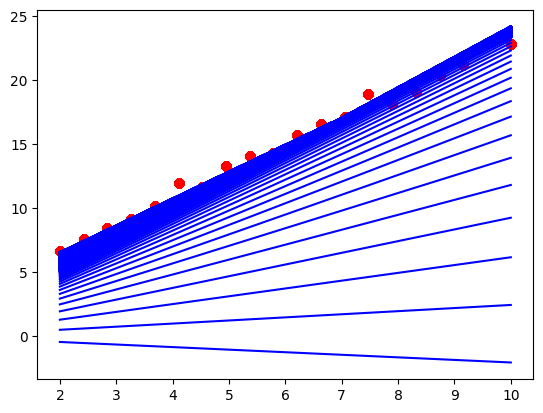

In [ ]:
model = LinearModel()

model.fit(x,y)
model.result()